In [36]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv(r"D:\fridge.csv")

In [3]:
data

,Brand,Liter_storage,Cool_type,Star,Ratings,Price
0,Liebherr,240.0,Frost Free,2.0,"<div class=""_3LWZlK"">5<img class=""_1wB99o"" src...",NaN
1,Liebherr,264.0,Frost Free,2.0,NaN,"31,990"
2,SAMSUNG,189.0,Direct Cool,5.0,"<div class=""_3LWZlK"">4.5<img class=""_1wB99o"" s...","17,890"
3,Godrej,180.0,Direct Cool,2.0,"<div class=""_3LWZlK"">4.3<img class=""_1wB99o"" s...","12,640"
4,SAMSUNG,236.0,Frost Free,3.0,"<div class=""_3LWZlK"">4.4<img class=""_1wB99o"" s...","25,990"
...,...,...,...,...,...,...
907,Whirlpool,245.0,Frost Free,2.0,"<div class=""_3LWZlK"">4.1<img class=""_1wB99o"" s...","24,599"
908,Liebherr,310.0,Frost Free,2.0,NaN,"39,990"
909,Whirlpool,231.0,Frost Free,2.0,"<div class=""_3LWZlK"">4.2<img class=""_1wB99o"" s...","25,790"
910,BOSCH,658.0,Frost Free,NaN,"<div class=""_3LWZlK"">3.7<img class=""_1wB99o"" s...","76,000"


In [5]:
data.head(5)

,Brand,Liter_storage,Cool_type,Star,Ratings,Price
0,Liebherr,240.0,Frost Free,2.0,"<div class=""_3LWZlK"">5<img class=""_1wB99o"" src...",NaN
1,Liebherr,264.0,Frost Free,2.0,NaN,"31,990"
2,SAMSUNG,189.0,Direct Cool,5.0,"<div class=""_3LWZlK"">4.5<img class=""_1wB99o"" s...","17,890"
3,Godrej,180.0,Direct Cool,2.0,"<div class=""_3LWZlK"">4.3<img class=""_1wB99o"" s...","12,640"
4,SAMSUNG,236.0,Frost Free,3.0,"<div class=""_3LWZlK"">4.4<img class=""_1wB99o"" s...","25,990"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          912 non-null    object 
 1   Liter_storage  874 non-null    float64
 2   Cool_type      911 non-null    object 
 3   Star           849 non-null    float64
 4   Ratings        692 non-null    object 
 5   Price          911 non-null    object 
dtypes: float64(2), object(4)
memory usage: 42.9+ KB


# Checking The column Name

In [9]:
data.columns

Index(['Brand', 'Liter_storage', 'Cool_type', 'Star', 'Ratings', 'Price'], dtype='object')

In [11]:
data.shape

(912, 6)

In [13]:
df=data.copy()

# Duplicate Values

In [21]:
df.duplicated().sum()

422

In [22]:
df.drop_duplicates(keep="first",inplace=True)

In [23]:
df.duplicated().sum()

0

# Finding Corrupted Data

In [25]:
df["Brand"].unique()

array(['Liebherr', 'SAMSUNG', 'Godrej', 'Whirlpool', 'LG', 'Electrolux',
       'Haier', 'CANDY', 'Panasonic', 'realme', 'MarQ', 'Voltas', 'Midea',
       'Lloyd', 'Lifelong', 'Hisense', 'Hitachi', 'BOSCH', 'Kelvinator',
       'Hyundai'], dtype=object)

In [26]:
df["Liter_storage"].unique()

array([240, 264, 189, 180, 236, 235, 242, 360, 310, 183,   0, 308, 205,
       231, 185, 184, 253, 223, 175, 275, 300, 237, 301, 190, 265, 325,
       244, 324, 192, 234, 215, 700, 207, 294, 260, 653, 173, 246, 322,
        30, 327, 500, 210, 272, 224, 198, 228, 591, 340, 335, 688, 200,
       201, 305, 307, 412, 564, 460, 343, 398, 328, 330, 296, 230, 336,
       565, 584, 258, 630, 268, 261, 655, 380, 346, 482, 202, 263, 279,
       592, 358, 363, 594, 411, 635, 187, 178, 676, 248, 259, 551,  95,
       445, 256, 188, 204, 430, 221, 385, 692, 331, 675, 274, 523, 285,
       600, 195,  45, 563, 531, 355, 332, 312, 657, 288, 197, 394,  92,
       712, 640, 633, 290, 375, 674, 257, 506, 631, 472, 694, 465, 461,
       350, 598, 291, 220, 544, 314, 280, 446, 650, 467,  44, 661, 420,
       415, 364, 345, 547, 668, 401, 570, 245, 658])

In [27]:
df["Cool_type"].unique()

array(['Frost Free', 'Direct Cool'], dtype=object)

In [28]:
df["Star"].unique() 

array([2, 5, 3, 1, 4, 0])

In [29]:
df["Price"].unique() 

array([     0,  31990,  17890,  12640,  25990,  22990,  23290,  25490,
        26990,  49990,  39990,  13789,  16690,  25790,  15890,  27190,
        33490,  24990,  14490,  18490,  17590,  21490,  13590,  11990,
        23990,  22390,  10490,  32990,  31000,  17290,  23490,  16090,
        35490,  13990,  24690,  14840,  15390,  37650,  12490,  16290,
        17790,  32490,  24790,  34990,  12690,  17490,  34490,  15090,
        19490,  24250,  18690,  14890,  20690,  17259,  81990,  18990,
        26999,  30999,  27490,  86990,  19990,  20590,  22490,  14299,
        27740,  12390,  14090,   7790,  37000,  20990,  12699,  16490,
        59840,  21999,  14290,  16390,  27990,  20790,  17990,  29490,
        28990,  18599,  21190,  33690,  15290,  36240,  29990,  16590,
        75990,  15990,  25199,  28240,  44990,  54990,  13150,  17390,
        41399,  19980,  36990,  18000,  14990,  52990,  13249,  19999,
        37490,  33650,  28499,  18790,  71644,  51990,  26050,  37890,
      

# Finding Missing Values

In [14]:
df.isna().sum()

Brand              0
Liter_storage     38
Cool_type          1
Star              63
Ratings          220
Price              1
dtype: int64

# Cleaning The Data

### Imputing The Missing Values

In [15]:
df["Cool_type"].mode()

0    Frost Free
Name: Cool_type, dtype: object

In [16]:
df["Liter_storage"].fillna("0",inplace=True)
df["Star"].fillna("0",inplace=True)
df["Cool_type"].fillna("Frost Free",inplace=True)
df["Ratings"].fillna("0",inplace=True)
df["Price"].fillna("0",inplace=True)

In [17]:
df.isna().sum()

Brand            0
Liter_storage    0
Cool_type        0
Star             0
Ratings          0
Price            0
dtype: int64

### Type conversion

In [18]:
df.dtypes

Brand            object
Liter_storage    object
Cool_type        object
Star             object
Ratings          object
Price            object
dtype: object

In [19]:
df["Star"]=df["Star"].astype(int)
df["Price"]=df["Price"].str.replace(",","").astype(int)
df["Liter_storage"]=df["Liter_storage"].astype(int)

In [20]:
df.dtypes

Brand            object
Liter_storage     int32
Cool_type        object
Star              int32
Ratings          object
Price             int32
dtype: object

# Identifying the Outliers

<Axes: ylabel='Star'>

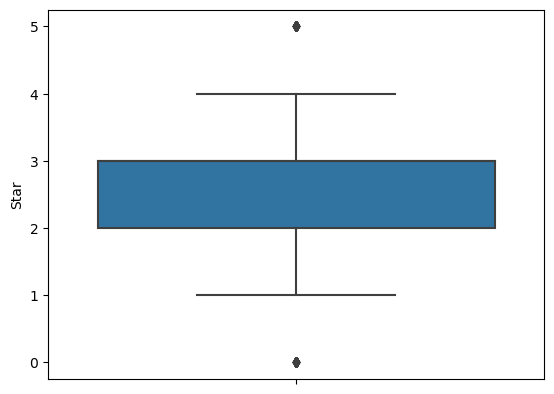

In [42]:
sns.boxplot(data=df,y="Star")

In [ ]:
In the above Boxplot there are outliers 

### Data Analysis and Visualization (EDA)

### Uni Variate Analysis

<Axes: >

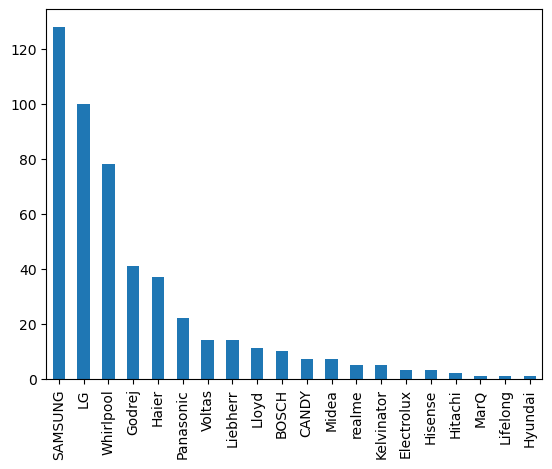

In [46]:
df["Brand"].value_counts().plot(kind="bar")

In [ ]:
In the above bar plot the samsung refrigerator brand  is having more count followed by LG and 
less count is having Hyundai,Lifelong and MarQ

<Axes: xlabel='Cool_type', ylabel='count'>

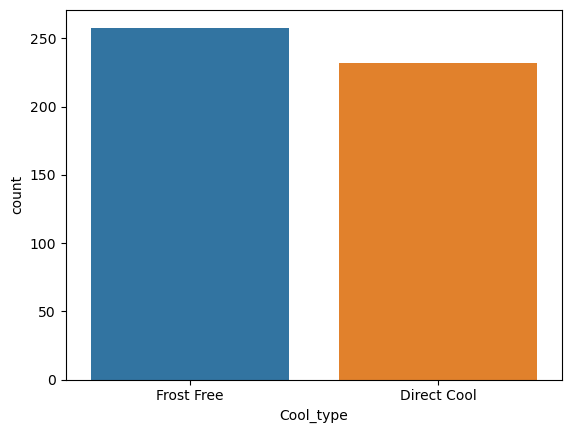

In [47]:
sns.countplot(data=df,x="Cool_type")

In [ ]:
In the above countplot the frost free is having more count compare to direct cool type

<Axes: ylabel='Star'>

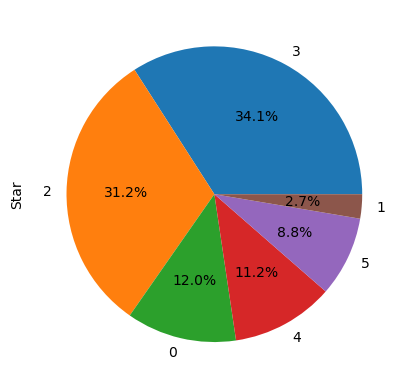

In [52]:
df["Star"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [ ]:
In the above pie chart the 3 star refrigerators are having high percentage , 
the 2 star also having good percentage similar to 3 star and 
one star refrigerators are with very low percentage.

<Axes: ylabel='Frequency'>

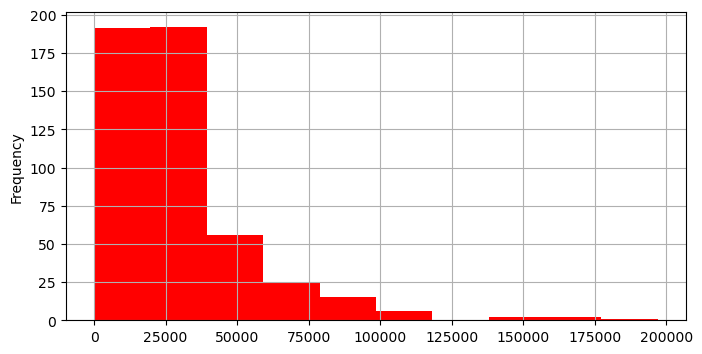

In [57]:
df["Price"].plot(kind="hist",color="red",grid=True,figsize=(8,4))

In [ ]:
In the above histogram the no of friges are occured in the price range is above 20k and below 35k,
the least occured are in the price range of 175k to 195k,
the second highest are in the price range of below 20k and there are no fridges between 120k to 135k and above 195k.

# Bi variate analysis

### Liter_storage Vs Brand

<Axes: xlabel='Liter_storage', ylabel='Brand'>

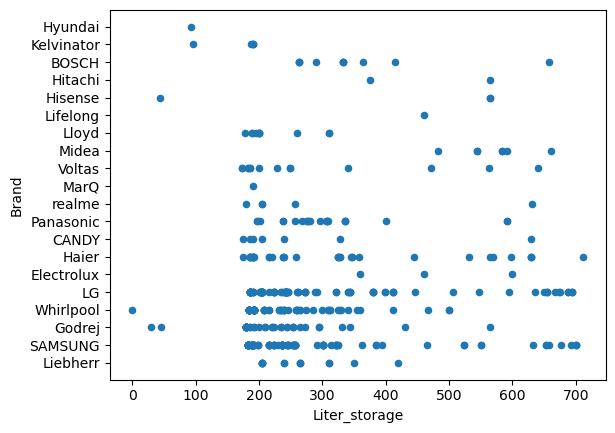

In [60]:
df.plot.scatter(x="Liter_storage",y="Brand")

In [ ]:
In the above scatterplot there are more brand fridges which are having 200Liter storage to 350Liter storage,
and 0L to 100L storage are very brands

In [62]:
df.columns

Index(['Brand', 'Liter_storage', 'Cool_type', 'Star', 'Ratings', 'Price'], dtype='object')

### Brand vs price

Text(0, 0.5, 'Price')

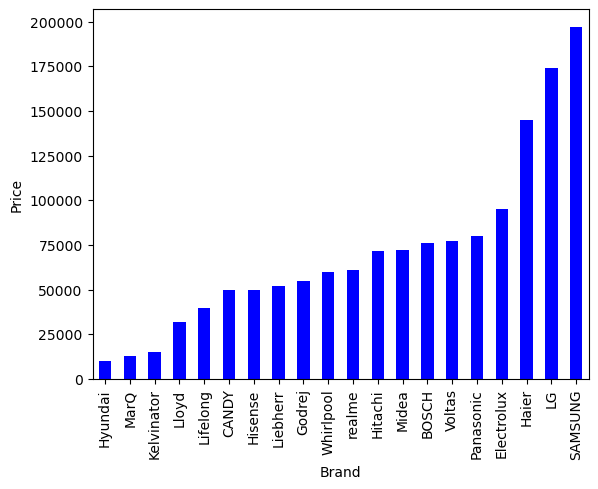

In [66]:
df.groupby(by="Brand")["Price"].max().sort_values().plot(kind="bar",color="blue")
plt.ylabel("Price")

In [ ]:
In the above barplot the samsung brand with the high price is having more count followed by haier and 
LG and the less count with least price are hyundai brand.


In [70]:
df.columns

Index(['Brand', 'Liter_storage', 'Cool_type', 'Star', 'Ratings', 'Price'], dtype='object')

### cool_type vs star

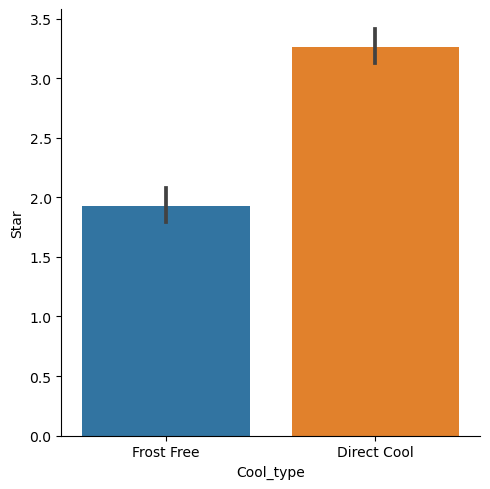

In [79]:
sns.catplot(data=df,x="Cool_type",y="Star",kind="bar")

In [ ]:
In the above barplot the direct cool  type refrigerators with below 4 star are more and
less are frost free with below 2 star

# Multi variate analysis

In [ ]:
gender=pd.crosstab(index=tips["day"],columns=tips["sex"],margins=True,values=tips["smoker"],aggfunc=["mean"])


In [87]:
fridge=pd.crosstab(index=df["Brand"],columns=df["Cool_type"],margins=True,values=df["Star"],aggfunc=["count"])

In [88]:
fridge

count                
Cool_type  Direct Cool Frost Free  All
Brand                                 
BOSCH              NaN       10.0   10
CANDY              4.0        3.0    7
Electrolux         NaN        3.0    3
Godrej            24.0       17.0   41
Haier             15.0       22.0   37
Hisense            1.0        2.0    3
Hitachi            NaN        2.0    2
Hyundai            1.0        NaN    1
Kelvinator         5.0        NaN    5
LG                47.0       53.0  100
Liebherr           5.0        9.0   14
Lifelong           NaN        1.0    1
Lloyd              8.0        3.0   11
MarQ               1.0        NaN    1
Midea              NaN        7.0    7
Panasonic          3.0       19.0   22
SAMSUNG           62.0       66.0  128
Voltas             8.0        6.0   14
Whirlpool         45.0       33.0   78
realme             3.0        2.0    5
All              232.0      258.0  490

<Axes: xlabel='None-Cool_type', ylabel='Brand'>

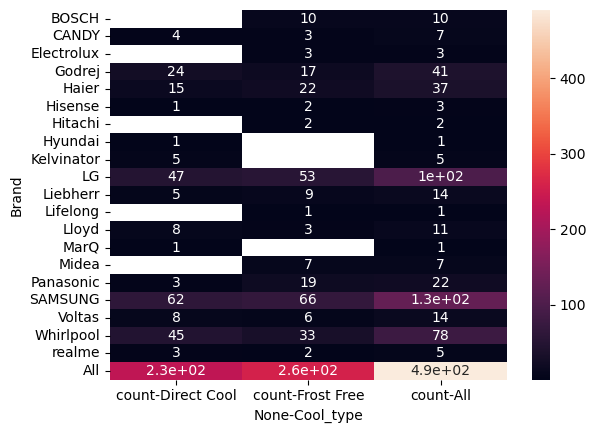

In [89]:
sns.heatmap(data=fridge,annot=True)

In [ ]:
In the above heatmap there are more number of star friges are in samsung brand with frost free and none cool_type 
followed by LG and less star fridges are in lifelong and hyundai.